In [2]:
%matplotlib inline

import pickle
import numpy as np
import matplotlib.pyplot as plt


In [3]:

filename = "./data/long_learning_data" 

# Getting back the objects:
with open(filename, 'rb') as f:
    stats, funds_wealth_all_episodes, learning_fund_stats = pickle.load(f)

### Total wealth

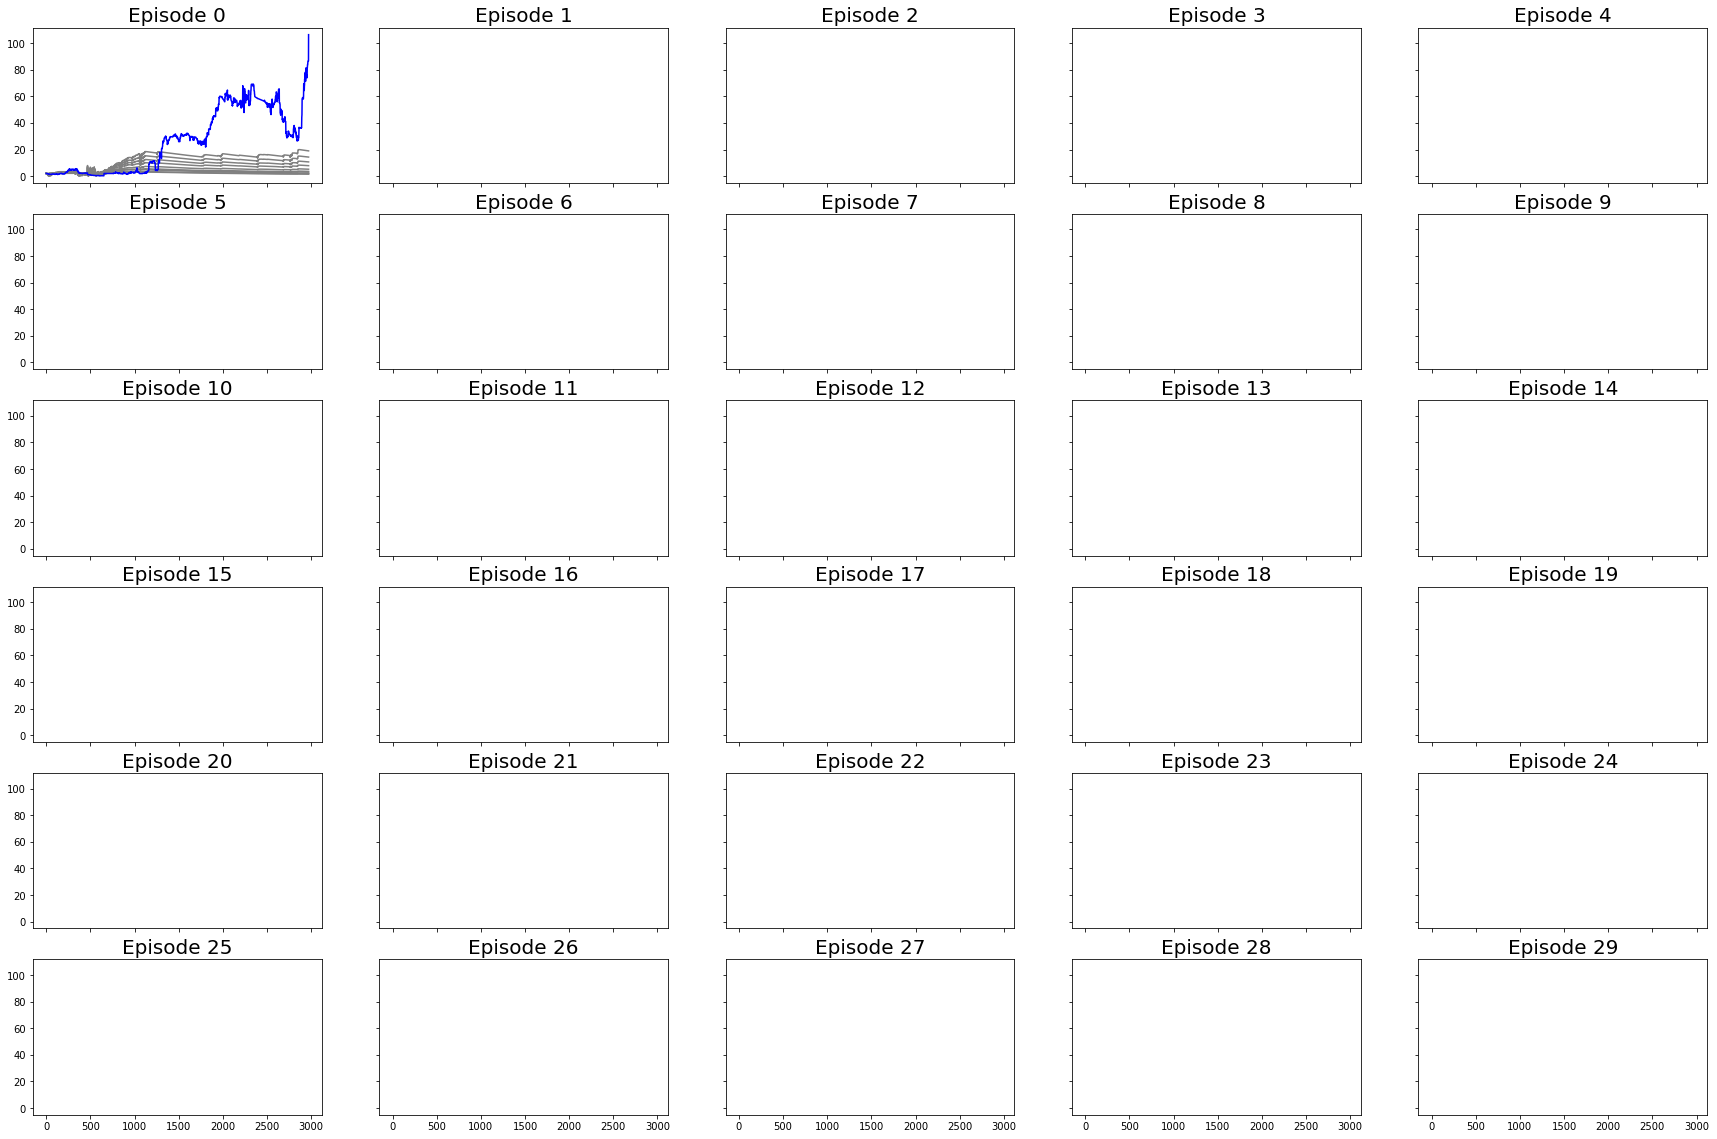

In [4]:
# assumes 10 episodes
fig, axes = plt.subplots(nrows=6, ncols=5, sharex=True,
                         sharey=True,figsize=(30,20)
                        )

for i, ax in enumerate(axes.flatten()):

    for j in range(11):
        episode = np.array(funds_wealth_all_episodes[i])
        if j == 10:
            ax.plot(episode.T[j], color='blue')
        else:
            ax.plot(episode.T[j], color='gray')
        
    ax.set_title("Episode {}".format(i), {'fontsize':20})
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("", fontsize=30);

# Saving
#fig.savefig("./figures/{}.png".format(experiment_name))

### Learning Fund

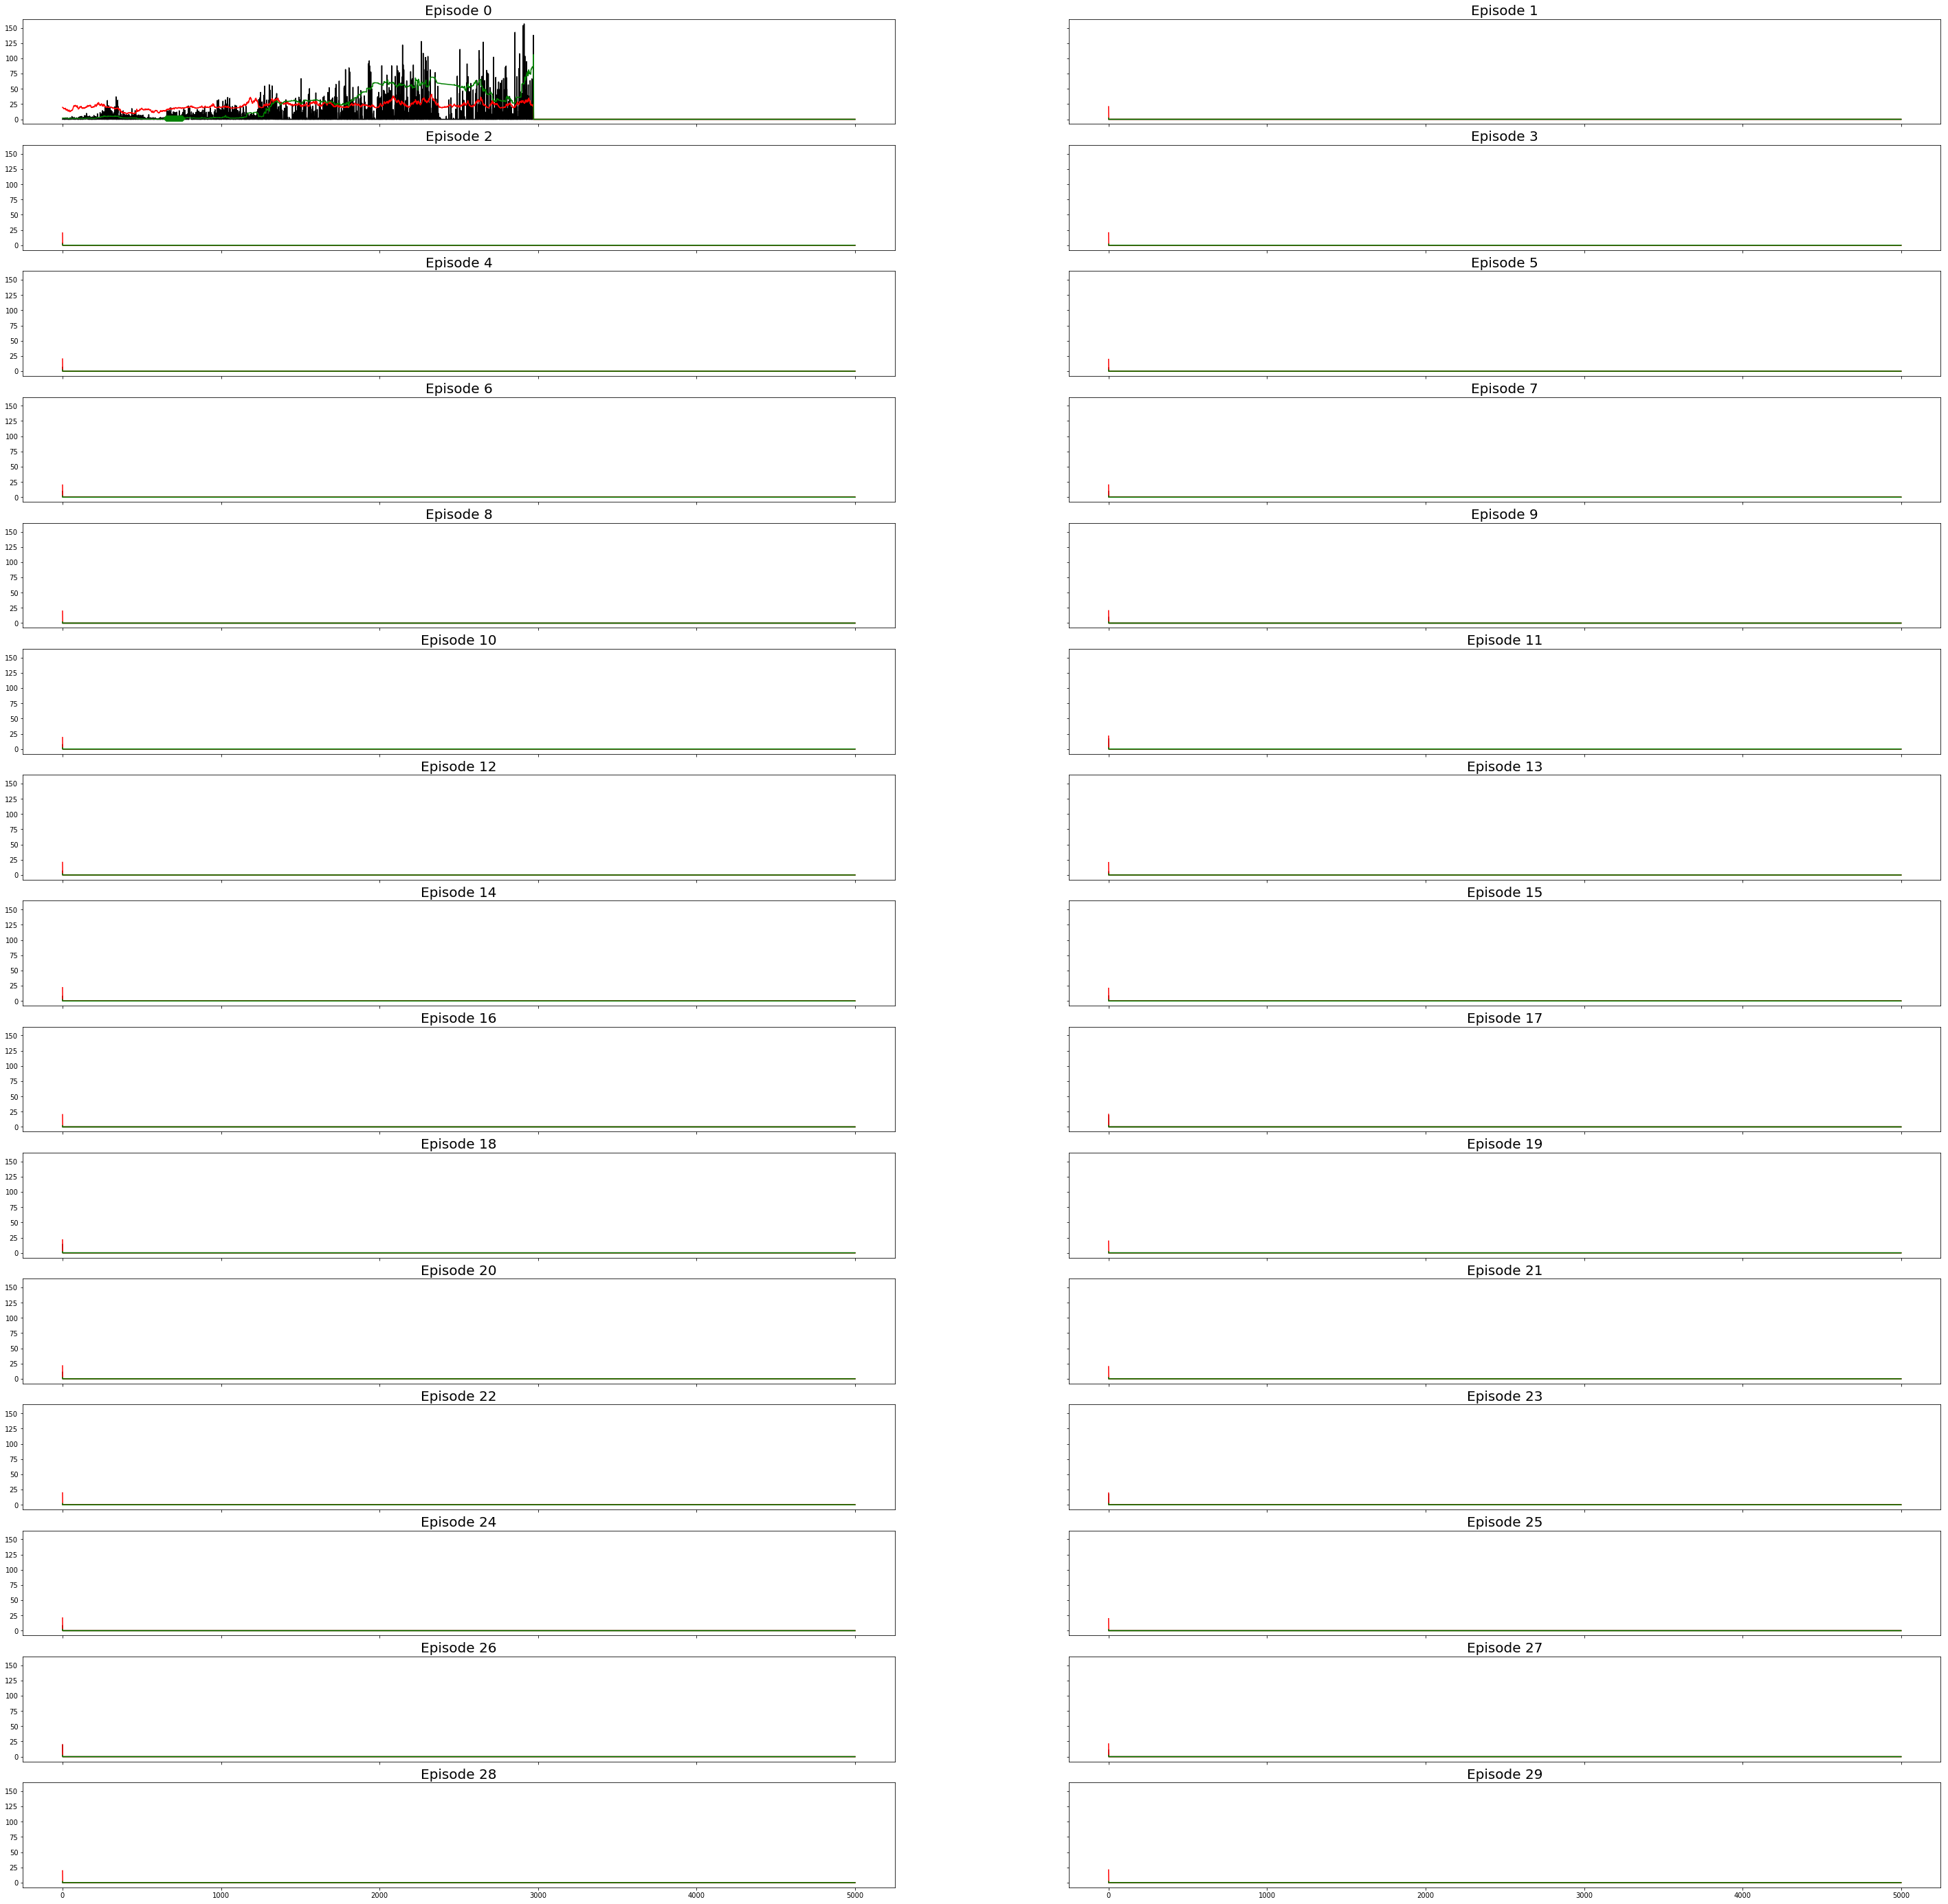

In [5]:
# assumes 30 episodes
fig, axes = plt.subplots(nrows=15, ncols=2, sharex=True,
                         sharey=True,figsize=(50,50)
                        )

for i, ax in enumerate(axes.flatten()):

        episode = learning_fund_stats[i]
        
        price = episode.T[0]*20
        demand = episode.T[1] 
        wealth = episode.T[2]
        
        markers_on = [i for i in range(len(wealth)) if wealth[i] == 2]
        
        ax.plot(demand, color='black')
        ax.plot(price, color='red')
        ax.plot(wealth, '-gD', markevery=markers_on)
        ax.plot()
        
        ax.set_title("Episode {}".format(i), {'fontsize':20})
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("", fontsize=30);

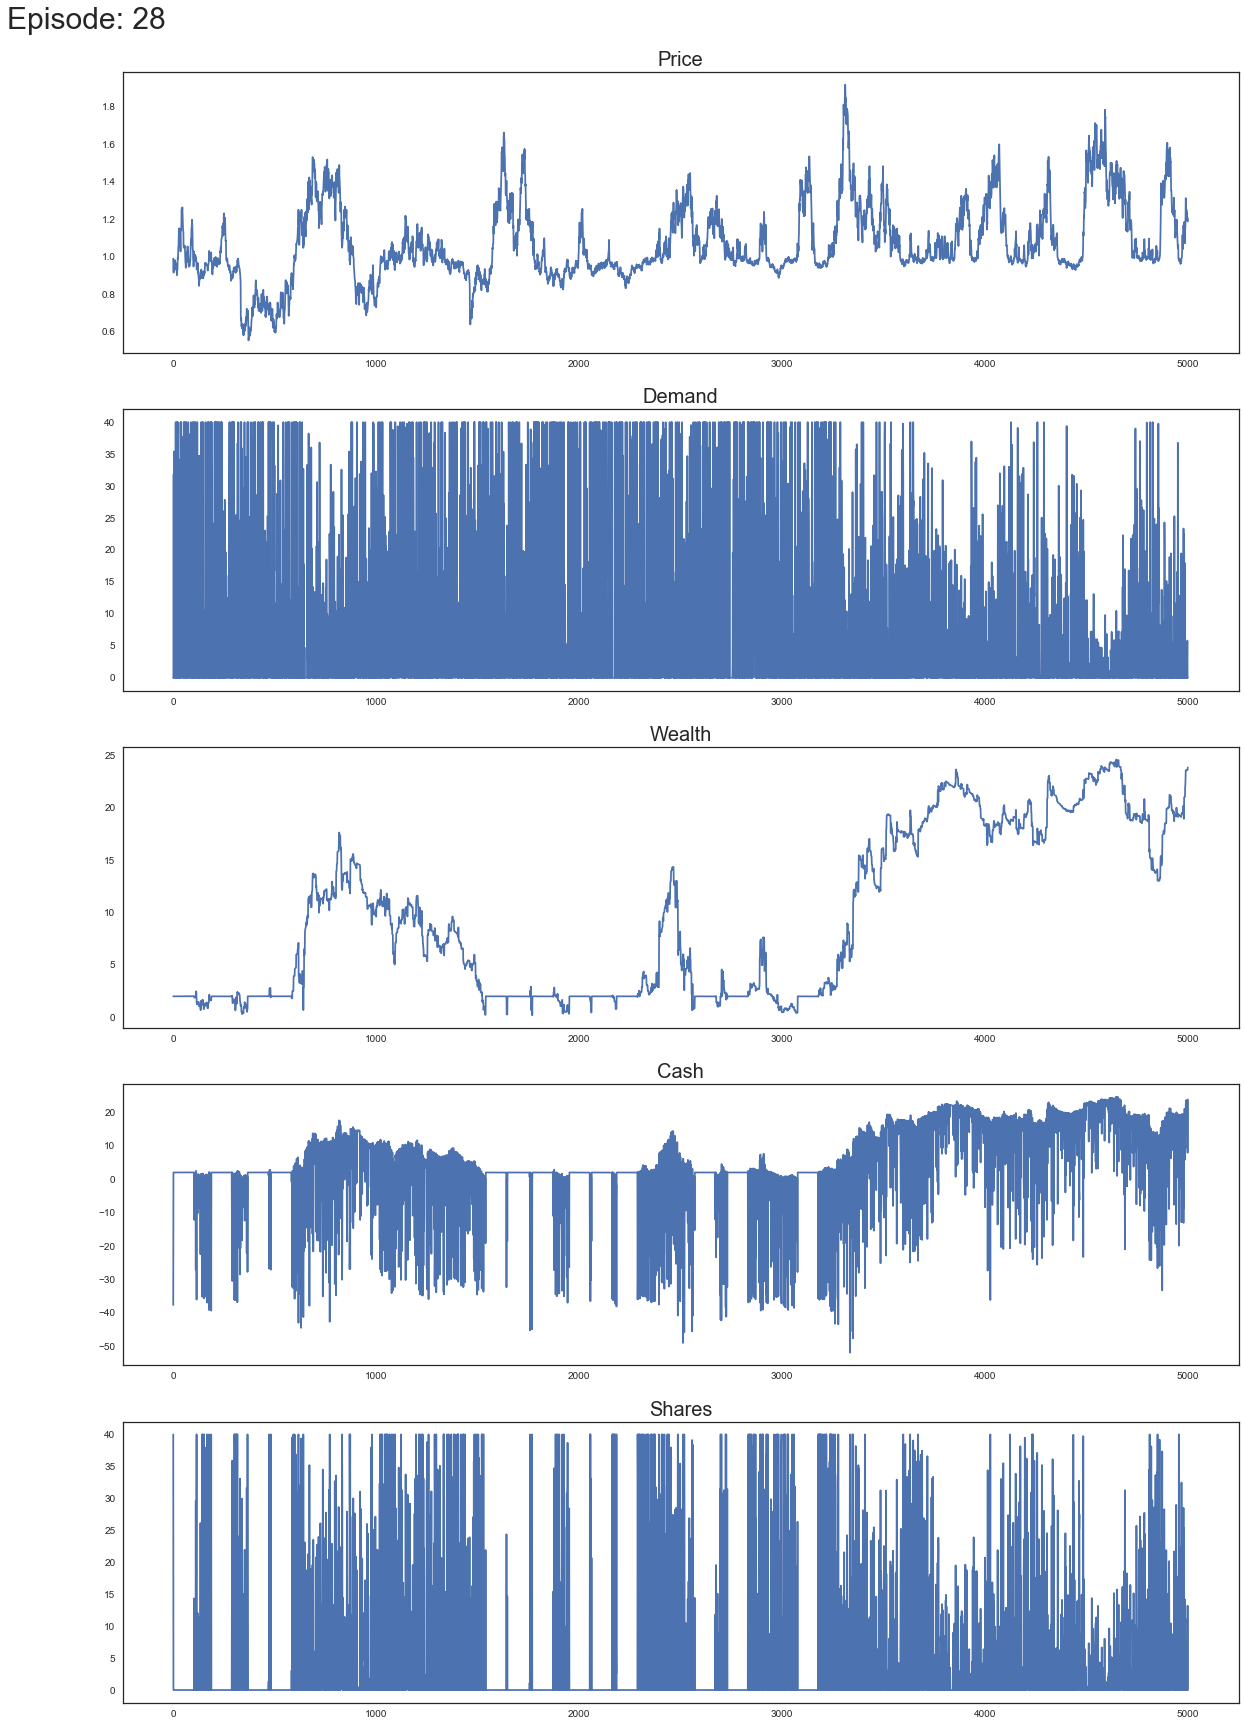

In [9]:
variables = ['Price', 'Demand', 'Wealth', 'Cash', 'Shares']

fig, axes = plt.subplots(nrows=5, ncols=1,figsize=(20,30))

episode_to_look_at = 28 

for i, ax in enumerate(axes.flatten()):
    
    variable = i
    
    episode = learning_fund_stats[episode_to_look_at]
    
    ax.plot(episode.T[i])
        
    ax.set_title(variables[i], {'fontsize':20})
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("Episode: {}".format(episode_to_look_at),
             fontsize=30, x=0.1, y=0.91);